Set OBSGEO-B to    -6.003921 from OBSGEO-[XYZ].
Set OBSGEO-H to 1334398781.814 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2023-09-10T05:47:44.353' from MJD-AVG.
Set DATE-END to '2023-09-10T08:04:22.856' from MJD-END'. [astropy.wcs.wcs]
[INFO] 632 x 71 x 75 Cube (/Users/mary/Fits image of JWST/ngc6302_ch4-medium_s3d.fits)
[INFO] .data(632 x 71 x 75) (MJy / sr), no noise
[INFO] center:(-37:06:12.7000602,-06:46:15.65735004) size:(24.850",26.250") step:(0.350",0.350") rot:-0.0 deg frame:ICRS
[INFO] wavelength: min:20.69 max:24.48 step:0.01 um


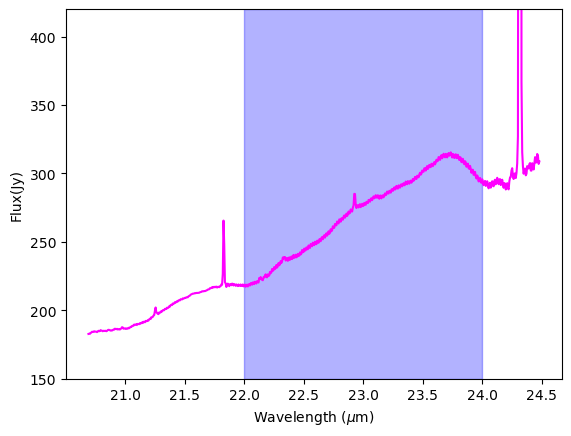

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from mpdaf.obj import Cube
from astropy.io import fits


obj1 = Cube('/Users/mary/Fits image of JWST/ngc6302_ch4-medium_s3d.fits')
obj1.info()


pixel_size = obj1.wcs.get_step(unit=u.arcsec)[0] 
solid_angle = (pixel_size * u.arcsec).to(u.rad)**2
flux_density = np.zeros(obj1.shape[0])


for i in range(obj1.shape[0]):
    surface_brightness_sum = np.sum(obj1.data[i, :, :])
    flux_density[i] = surface_brightness_sum * solid_angle.value * 1e6


np.savetxt('wavelength_flux_data23.71.txt', np.column_stack((obj1.wave.coord(), flux_density)), header='Wavelength (um), Flux Density (Jy)', fmt='%f')
plt.figure()
plt.plot(obj1.wave.coord(), flux_density, color='magenta')
plt.xlabel('Wavelength ($\mu$m)')
plt.ylabel('Flux(Jy)')
plt.title('')
plt.ylim(150, 420)  
plt.axvspan(22, 24, color='blue', alpha=0.3)
plt.savefig('23spectra2.png', dpi=300, bbox_inches='tight')
plt.show()

